In [1]:
import utilities
import pandas as pd
import os

If it's the first time we run the code, we'll download the data from bigquery

In [2]:
dataFileName = "data.json"
if (not os.path.exists(dataFileName)):
    data = utilities.retrieveBigQueryData("bigquery-public-data:google_analytics_sample.ga_sessions_20170801")
    data.to_json(dataFileName, orient="records")

We import the data

In [3]:
data = pd.read_json(dataFileName)

We have 2556 rows of Analytics data, with 16 columns

In [4]:
data.shape

(2556, 16)

Many of the columns are objects that contain nested data. Two columns (customDimensions, hits) are arrays of data.

In [5]:
data.head(3)

,visitorId,visitNumber,visitId,visitStartTime,date,totals,trafficSource,device,geoNetwork,customDimensions,hits,fullVisitorId,userId,clientId,channelGrouping,socialEngagementType
0,NaN,1,1501583974,1501583974,20170801,"{'visits': 1, 'hits': 1, 'pageviews': 1, 'time...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Car...",[],"[{'hitNumber': 1, 'time': 0, 'hour': 3, 'minut...",2.248282e+18,NaN,NaN,Organic Search,Not Socially Engaged
1,NaN,1,1501616585,1501616585,20170801,"{'visits': 1, 'hits': 1, 'pageviews': 1, 'time...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 12, 'minu...",8.647436e+18,NaN,NaN,Organic Search,Not Socially Engaged
2,NaN,1,1501583344,1501583344,20170801,"{'visits': 1, 'hits': 1, 'pageviews': 1, 'time...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Asia', 'subContinent': 'Souther...","[{'index': 4, 'value': 'APAC'}]","[{'hitNumber': 1, 'time': 0, 'hour': 3, 'minut...",2.055840e+18,NaN,NaN,Organic Search,Not Socially Engaged


Some of the columns (visitorId, userId, clientId) contain no data (due to privacy matters, with this being a sample dataset).
However, we have to keep in mind that the columns with objects or arrays may contain empty objects/arrays.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   visitorId             0 non-null      float64
 1   visitNumber           2556 non-null   int64  
 2   visitId               2556 non-null   int64  
 3   visitStartTime        2556 non-null   int64  
 4   date                  2556 non-null   int64  
 5   totals                2556 non-null   object 
 6   trafficSource         2556 non-null   object 
 7   device                2556 non-null   object 
 8   geoNetwork            2556 non-null   object 
 9   customDimensions      2556 non-null   object 
 10  hits                  2556 non-null   object 
 11  fullVisitorId         2556 non-null   float64
 12  userId                0 non-null      float64
 13  clientId              0 non-null      float64
 14  channelGrouping       2556 non-null   object 
 15  socialEngagementType 

Let's print some descriptive statistics of the data

In [7]:
data.describe(include="all")

,visitorId,visitNumber,visitId,visitStartTime,date,totals,trafficSource,device,geoNetwork,customDimensions,hits,fullVisitorId,userId,clientId,channelGrouping,socialEngagementType
count,0.0,2556.000000,2.556000e+03,2.556000e+03,2556.0,2556,2556,2556,2556,2556,2556,2.556000e+03,0.0,0.0,2556,2556
unique,NaN,NaN,NaN,NaN,NaN,1083,177,39,830,6,2536,NaN,NaN,NaN,7,1
top,NaN,NaN,NaN,NaN,NaN,"{'visits': 1, 'hits': 1, 'pageviews': 1, 'time...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 6, 'minut...",NaN,NaN,NaN,Organic Search,Not Socially Engaged
freq,NaN,NaN,NaN,NaN,NaN,979,1137,665,223,1372,3,NaN,NaN,NaN,1346,2556
mean,NaN,2.661189,1.501614e+09,1.501614e+09,20170801.0,NaN,NaN,NaN,NaN,NaN,NaN,4.549451e+18,NaN,NaN,NaN,NaN
std,NaN,12.022200,2.280455e+04,2.280423e+04,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3.107969e+18,NaN,NaN,NaN,NaN
min,NaN,1.000000,1.501570e+09,1.501571e+09,20170801.0,NaN,NaN,NaN,NaN,NaN,NaN,3.458418e+15,NaN,NaN,NaN,NaN
25%,NaN,1.000000,1.501597e+09,1.501597e+09,20170801.0,NaN,NaN,NaN,NaN,NaN,NaN,1.627093e+18,NaN,NaN,NaN,NaN
50%,NaN,1.000000,1.501614e+09,1.501614e+09,20170801.0,NaN,NaN,NaN,NaN,NaN,NaN,4.466389e+18,NaN,NaN,NaN,NaN
75%,NaN,2.000000,1.501632e+09,1.501632e+09,20170801.0,NaN,NaN,NaN,NaN,NaN,NaN,7.350971e+18,NaN,NaN,NaN,NaN


If we try to check for duplicates we get an error, due to the impossibility to confront the object columns data. 

In [8]:
try:
    data.duplicated().sum()
except:
    print("Error")

Error


Let's extract the names of the columns that contain nested object data.

In [9]:
objCols = utilities.getListOfObjectColumns(data)
objCols

['totals', 'trafficSource', 'device', 'geoNetwork']

For each of these columns, we'll replace the original nested column with one column for every object property

In [10]:
for col in objCols:
    utilities.extractNestedObjectData(data, col)

We can see how, for example, the ```totals``` column has been replaced by a variety of columns starting with ```totals_```

In [11]:
pd.set_option('display.max_columns', None)
data.head()

,visitorId,visitNumber,visitId,visitStartTime,date,totals_visits,totals_hits,totals_pageviews,totals_timeOnSite,totals_bounces,totals_transactions,totals_transactionRevenue,totals_newVisits,totals_screenviews,totals_uniqueScreenviews,totals_timeOnScreen,totals_totalTransactionRevenue,totals_sessionQualityDim,trafficSource_referralPath,trafficSource_campaign,trafficSource_source,trafficSource_medium,trafficSource_keyword,trafficSource_adContent,trafficSource_adwordsClickInfo,trafficSource_isTrueDirect,trafficSource_campaignCode,device_browser,device_browserVersion,device_browserSize,device_operatingSystem,device_operatingSystemVersion,device_isMobile,device_mobileDeviceBranding,device_mobileDeviceModel,device_mobileInputSelector,device_mobileDeviceInfo,device_mobileDeviceMarketingName,device_flashVersion,device_javaEnabled,device_language,device_screenColors,device_screenResolution,device_deviceCategory,geoNetwork_continent,geoNetwork_subContinent,geoNetwork_country,geoNetwork_region,geoNetwork_metro,geoNetwork_city,geoNetwork_cityId,geoNetwork_networkDomain,geoNetwork_latitude,geoNetwork_longitude,geoNetwork_networkLocation,customDimensions,hits,fullVisitorId,userId,clientId,channelGrouping,socialEngagementType
0,NaN,1,1501583974,1501583974,20170801,1,1,1,NaN,1.0,NaN,NaN,1.0,None,None,None,NaN,1,None,(not set),(direct),(none),None,None,"{'campaignId': None, 'adGroupId': None, 'creat...",None,None,Chrome,not available in demo dataset,not available in demo dataset,Android,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,None,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile,Americas,Caribbean,St. Lucia,(not set),(not set),(not set),not available in demo dataset,unknown.unknown,not available in demo dataset,not available in demo dataset,not available in demo dataset,[],"[{'hitNumber': 1, 'time': 0, 'hour': 3, 'minut...",2.248282e+18,NaN,NaN,Organic Search,Not Socially Engaged
1,NaN,1,1501616585,1501616585,20170801,1,1,1,NaN,1.0,NaN,NaN,1.0,None,None,None,NaN,1,None,(not set),(direct),(none),None,None,"{'campaignId': None, 'adGroupId': None, 'creat...",None,None,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,None,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset,"[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 12, 'minu...",8.647436e+18,NaN,NaN,Organic Search,Not Socially Engaged
2,NaN,1,1501583344,1501583344,20170801,1,1,1,NaN,1.0,NaN,NaN,1.0,None,None,None,NaN,1,None,(not set),(direct),(none),None,None,"{'campaignId': None, 'adGroupId': None, 'creat...",None,None,Chrome,not available in demo dataset,not available in demo dataset,Android,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,None,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile,Asia,Southern Asia,India,Delhi,(not set),New Delhi,not available in demo dataset,unknown.unknown,not available in demo dataset,not available in demo dataset,not available in demo dataset,"[{'index': 4, 'value': 'APAC'}]","[{'hitNumber': 1, 'time': 0, 'hour': 3, 'minut...",2.055840e+18,NaN,NaN,Organic S

Let's check whether there are other nested objects

In [12]:
objCols = utilities.getListOfObjectColumns(data)
objCols

['trafficSource_adwordsClickInfo']

Let's repeat the extraction operation iteratively until there are no more data nested in objects

In [13]:
while (len(objCols) > 0):
    for col in objCols:
        utilities.extractNestedObjectData(data, col)
    objCols = utilities.getListOfObjectColumns(data)

Now let's continue the manipulation process by transforming the array-type data to single values, so that we can later perform statistics and plotting on the data

In [14]:
pd.set_option('display.max_colwidth', 250)
arrayCols = utilities.getListOfArrayColumns(data)
data[arrayCols].head(10)

,customDimensions,hits
0,[],"[{'hitNumber': 1, 'time': 0, 'hour': 3, 'minute': 39, 'isSecure': None, 'isInteraction': True, 'isEntrance': True, 'isExit': True, 'referer': 'http://www.google.com/', 'page': {'pagePath': '/google+redesign/electronics', 'hostname': 'shop.googlem..."
1,"[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 12, 'minute': 43, 'isSecure': None, 'isInteraction': True, 'isEntrance': True, 'isExit': True, 'referer': 'https://www.google.com/', 'page': {'pagePath': '/google+redesign/apparel/mens/mens+outerwear', 'hostna..."
2,"[{'index': 4, 'value': 'APAC'}]","[{'hitNumber': 1, 'time': 0, 'hour': 3, 'minute': 29, 'isSecure': None, 'isInteraction': True, 'isEntrance': True, 'isExit': True, 'referer': 'https://www.google.co.in/', 'page': {'pagePath': '/google+redesign/shop+by+brand/android', 'hostname': ..."
3,"[{'index': 4, 'value': 'EMEA'}]","[{'hitNumber': 1, 'time': 0, 'hour': 0, 'minute': 43, 'isSecure': None, 'isInteraction': True, 'isEntrance': True, 'isExit': True, 'referer': None, 'page': {'pagePath': '/google+redesign/electronics/power', 'hostname': 'shop.googlemerchandisestor..."
4,"[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 22, 'minute': 24, 'isSecure': None, 'isInteraction': True, 'isEntrance': True, 'isExit': True, 'referer': None, 'page': {'pagePath': '/google+redesign/apparel/mens', 'hostname': 'shop.googlemerchandisestore.co..."
5,[],"[{'hitNumber': 1, 'time': 0, 'hour': 11, 'minute': 19, 'isSecure': None, 'isInteraction': True, 'isEntrance': True, 'isExit': True, 'referer': 'https://www.google.com.vn/imgres?imgurl=https%3A%2F%2Fshop.googlemerchandisestore.com%2Fstore%2F201605..."
6,"[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 8, 'minute': 13, 'isSecure': None, 'isInteraction': True, 'isEntrance': True, 'isExit': True, 'referer': 'https://www.google.ca/', 'page': {'pagePath': '/google+redesign/apparel/mens/mens+outerwear', 'hostname..."
7,"[{'index': 4, 'value': 'APAC'}]","[{'hitNumber': 1, 'time': 0, 'hour': 19, 'minute': 16, 'isSecure': None, 'isInteraction': True, 'isEntrance': True, 'isExit': True, 'referer': 'https://www.google.co.id/', 'page': {'pagePath': '/google+redesign/office/notebooks++journals', 'hostn..."
8,"[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 4, 'minute': 4, 'isSecure': None, 'isInteraction': True, 'isEntrance': True, 'isExit': True, 'referer': None, 'page': {'pagePath': '/google+redesign/shop+by+brand/google', 'hostname': 'shop.googlemerchandisest..."
9,"[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 18, 'minute': 0, 'isSecure': None, 'isInteraction': True, 'isEntrance': True, 'isExit': True, 'referer': 'https://www.google.com/', 'page': {'pagePath': '/google+redesign/apparel/mens/mens+outerwear', 'hostnam..."


By exploring the number of array values in each cell, we can see that the customDimensions column contains with zero or one option, meanwhile the hits column can contain multiple info per each data row.

In [15]:
for col in arrayCols:
    print(col)
    print(data[col].map(lambda val: 0 if None else len(val)).unique(), "\n")

customDimensions
[0 1] 

hits
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  32  33  34  35  36  37
  38  39  42  44  45  47  48  53  55  58  60  62  63  64  71  78  80  81
  82  84 100 140 156 193 302] 



We can transform the customDimensions column by extracting the object in each array

In [16]:
data.customDimensions = data.customDimensions.map(lambda val: None if (val == None or len(val) == 0) else val[0])

Then we can repeat the logic to extract data from objects

In [17]:
utilities.extractNestedObjectData(data, "customDimensions")

In [18]:
data[[col for col in data.columns if col.startswith("customDimensions")]].head()

,customDimensions_index,customDimensions_value
0,NaN,None
1,4.0,North America
2,4.0,APAC
3,4.0,EMEA
4,4.0,North America


Let's then proceed to extracting the hits data in a new dataframe

In [19]:
hits = data[["hits"]]
hits.head()

,hits
0,"[{'hitNumber': 1, 'time': 0, 'hour': 3, 'minute': 39, 'isSecure': None, 'isInteraction': True, 'isEntrance': True, 'isExit': True, 'referer': 'http://www.google.com/', 'page': {'pagePath': '/google+redesign/electronics', 'hostname': 'shop.googlem..."
1,"[{'hitNumber': 1, 'time': 0, 'hour': 12, 'minute': 43, 'isSecure': None, 'isInteraction': True, 'isEntrance': True, 'isExit': True, 'referer': 'https://www.google.com/', 'page': {'pagePath': '/google+redesign/apparel/mens/mens+outerwear', 'hostna..."
2,"[{'hitNumber': 1, 'time': 0, 'hour': 3, 'minute': 29, 'isSecure': None, 'isInteraction': True, 'isEntrance': True, 'isExit': True, 'referer': 'https://www.google.co.in/', 'page': {'pagePath': '/google+redesign/shop+by+brand/android', 'hostname': ..."
3,"[{'hitNumber': 1, 'time': 0, 'hour': 0, 'minute': 43, 'isSecure': None, 'isInteraction': True, 'isEntrance': True, 'isExit': True, 'referer': None, 'page': {'pagePath': '/google+redesign/electronics/power', 'hostname': 'shop.googlemerchandisestor..."
4,"[{'hitNumber': 1, 'time': 0, 'hour': 22, 'minute': 24, 'isSecure': None, 'isInteraction': True, 'isEntrance': True, 'isExit': True, 'referer': None, 'page': {'pagePath': '/google+redesign/apparel/mens', 'hostname': 'shop.googlemerchandisestore.co..."


We can then remove the hits data from the original dataframe, which now will contain only cells with one-dimensional values, that is fit for performing analysis. 

In [20]:
data.drop(columns=["hits"], inplace=True)
data.head()

,visitorId,visitNumber,visitId,visitStartTime,date,totals_visits,totals_hits,totals_pageviews,totals_timeOnSite,totals_bounces,totals_transactions,totals_transactionRevenue,totals_newVisits,totals_screenviews,totals_uniqueScreenviews,totals_timeOnScreen,totals_totalTransactionRevenue,totals_sessionQualityDim,trafficSource_referralPath,trafficSource_campaign,trafficSource_source,trafficSource_medium,trafficSource_keyword,trafficSource_adContent,trafficSource_adwordsClickInfo_campaignId,trafficSource_adwordsClickInfo_adGroupId,trafficSource_adwordsClickInfo_creativeId,trafficSource_adwordsClickInfo_criteriaId,trafficSource_adwordsClickInfo_page,trafficSource_adwordsClickInfo_slot,trafficSource_adwordsClickInfo_criteriaParameters,trafficSource_adwordsClickInfo_gclId,trafficSource_adwordsClickInfo_customerId,trafficSource_adwordsClickInfo_adNetworkType,trafficSource_adwordsClickInfo_targetingCriteria_boomUserlistId,trafficSource_adwordsClickInfo_isVideoAd,trafficSource_isTrueDirect,trafficSource_campaignCode,device_browser,device_browserVersion,device_browserSize,device_operatingSystem,device_operatingSystemVersion,device_isMobile,device_mobileDeviceBranding,device_mobileDeviceModel,device_mobileInputSelector,device_mobileDeviceInfo,device_mobileDeviceMarketingName,device_flashVersion,device_javaEnabled,device_language,device_screenColors,device_screenResolution,device_deviceCategory,geoNetwork_continent,geoNetwork_subContinent,geoNetwork_country,geoNetwork_region,geoNetwork_metro,geoNetwork_city,geoNetwork_cityId,geoNetwork_networkDomain,geoNetwork_latitude,geoNetwork_longitude,geoNetwork_networkLocation,customDimensions_index,customDimensions_value,fullVisitorId,userId,clientId,channelGrouping,socialEngagementType
0,NaN,1,1501583974,1501583974,20170801,1,1,1,NaN,1.0,NaN,NaN,1.0,None,None,None,NaN,1,None,(not set),(direct),(none),None,None,None,None,None,None,NaN,None,not available in demo dataset,None,None,None,None,None,None,None,Chrome,not available in demo dataset,not available in demo dataset,Android,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,None,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile,Americas,Caribbean,St. Lucia,(not set),(not set),(not set),not available in demo dataset,unknown.unknown,not available in demo dataset,not available in demo dataset,not available in demo dataset,NaN,None,2.248282e+18,NaN,NaN,Organic Search,Not Socially Engaged
1,NaN,1,1501616585,1501616585,20170801,1,1,1,NaN,1.0,NaN,NaN,1.0,None,None,None,NaN,1,None,(not set),(direct),(none),None,None,None,None,None,None,NaN,None,not available in demo dataset,None,None,None,None,None,None,None,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,None,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset,4.0,North America,8.647436e+18,NaN,NaN,Organic Search,Not Socially Engaged
2,NaN,1,1501583344,1501583344,20170801,1,1,1,NaN,1.0,NaN,NaN,1.0,None,None,None,NaN,1,None,(not set),(direct),(none),None,None,None,None,None,None,NaN,None,not available in demo dataset,None,None,None,None,None,None,None,Chrome,not available in demo dataset,not available in demo dataset,Android,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not availab

We can now get more information from descriptive statistics (compared to before, when we couldn't explore data inside object-type columns)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 73 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   visitorId                                                        0 non-null      float64
 1   visitNumber                                                      2556 non-null   int64  
 2   visitId                                                          2556 non-null   int64  
 3   visitStartTime                                                   2556 non-null   int64  
 4   date                                                             2556 non-null   int64  
 5   totals_visits                                                    2556 non-null   int64  
 6   totals_hits                                                      2556 non-null   int64  
 7   totals_pageviews                          

In [21]:
data.describe(include="all")

,visitorId,visitNumber,visitId,visitStartTime,date,totals_visits,totals_hits,totals_pageviews,totals_timeOnSite,totals_bounces,totals_transactions,totals_transactionRevenue,totals_newVisits,totals_screenviews,totals_uniqueScreenviews,totals_timeOnScreen,totals_totalTransactionRevenue,totals_sessionQualityDim,trafficSource_referralPath,trafficSource_campaign,trafficSource_source,trafficSource_medium,trafficSource_keyword,trafficSource_adContent,trafficSource_adwordsClickInfo_campaignId,trafficSource_adwordsClickInfo_adGroupId,trafficSource_adwordsClickInfo_creativeId,trafficSource_adwordsClickInfo_criteriaId,trafficSource_adwordsClickInfo_page,trafficSource_adwordsClickInfo_slot,trafficSource_adwordsClickInfo_criteriaParameters,trafficSource_adwordsClickInfo_gclId,trafficSource_adwordsClickInfo_customerId,trafficSource_adwordsClickInfo_adNetworkType,trafficSource_adwordsClickInfo_targetingCriteria_boomUserlistId,trafficSource_adwordsClickInfo_isVideoAd,trafficSource_isTrueDirect,trafficSource_campaignCode,device_browser,device_browserVersion,device_browserSize,device_operatingSystem,device_operatingSystemVersion,device_isMobile,device_mobileDeviceBranding,device_mobileDeviceModel,device_mobileInputSelector,device_mobileDeviceInfo,device_mobileDeviceMarketingName,device_flashVersion,device_javaEnabled,device_language,device_screenColors,device_screenResolution,device_deviceCategory,geoNetwork_continent,geoNetwork_subContinent,geoNetwork_country,geoNetwork_region,geoNetwork_metro,geoNetwork_city,geoNetwork_cityId,geoNetwork_networkDomain,geoNetwork_latitude,geoNetwork_longitude,geoNetwork_networkLocation,customDimensions_index,customDimensions_value,fullVisitorId,userId,clientId,channelGrouping,socialEngagementType
count,0.0,2556.000000,2.556000e+03,2.556000e+03,2556.0,2556.0,2556.000000,2556.000000,1310.000000,1238.0,43.000000,4.300000e+01,1872.0,0,0,0,4.300000e+01,2556.000000,649,2556,2556,2556,5,12,0,0,0,0,58.0,58,2556,58,0,58,0,58,872,0,2556,2556,2556,2556,2556,2556,2556,2556,2556,2556,2556,2556,0,2556,2556,2556,2556,2556,2556,2556,2556,2556,2556,2556,2556,2556,2556,2556,2210.0,2210,2.556000e+03,0.0,0.0,2556,2556
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,88,2,35,5,3,2,0,0,0,0,NaN,1,1,52,0,1,0,1,1,0,15,1,1,9,1,2,1,1,1,1,1,1,0,1,1,1,3,6,19,94,42,19,56,1,524,1,1,1,NaN,5,NaN,NaN,NaN,7,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/,(not set),(direct),(none),(not provided),Display Ad created 3/11/14,NaN,NaN,NaN,NaN,NaN,Top,not available in demo dataset,CjwKCAjwzYDMBRA1EiwAwCv6Jt0kCNNM8qAVQ6PaGsphV9fVcRYPcflElr_b0m4ZeSE1ku2wlrK29hoCKQ4QAvD_BwE,NaN,Google Search,NaN,False,True,NaN,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,NaN,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset,NaN,North America,NaN,NaN,NaN,Organic Search,Not Socially Engaged
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,330,2504,2166,2166,3,11,NaN,NaN,NaN,NaN,NaN,58,2556,4,NaN,58,NaN,58,872,NaN,1900,2556,2556,834,2556,1741,2556,2556,2556,2556,2556,2556,NaN,2556,2556,2556,1742,1472,1372,1287,1388,1388,1388,2556,1003,2556,2556,2556,NaN,1372,NaN,NaN,NaN,1346,2556
mean,NaN,2.661189,1.501614e+09,1.501614e+09,20170801.0,1.0,5.177230,4.279734,325.051908,1.0,1.046512,1.931381e+08,1.0,NaN,NaN,NaN,2.067442e+08,5.832942,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

Now that we've reduced data to one-dimensional values, we can check for duplicates. 
There are none.

In [22]:
data.duplicated().sum()

0

In [23]:
import seaborn as sns

In [24]:
data.shape

(2556, 73)

In [27]:
data[[col for col in data.columns if col.startswith("totals")]]

,totals_visits,totals_hits,totals_pageviews,totals_timeOnSite,totals_bounces,totals_transactions,totals_transactionRevenue,totals_newVisits,totals_screenviews,totals_uniqueScreenviews,totals_timeOnScreen,totals_totalTransactionRevenue,totals_sessionQualityDim
0,1,1,1,NaN,1.0,NaN,NaN,1.0,None,None,None,NaN,1
1,1,1,1,NaN,1.0,NaN,NaN,1.0,None,None,None,NaN,1
2,1,1,1,NaN,1.0,NaN,NaN,1.0,None,None,None,NaN,1
3,1,1,1,NaN,1.0,NaN,NaN,1.0,None,None,None,NaN,1
4,1,1,1,NaN,1.0,NaN,NaN,NaN,None,None,None,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2551,1,11,7,53.0,NaN,NaN,NaN,1.0,None,None,None,NaN,1
2552,1,12,9,1449.0,NaN,NaN,NaN,NaN,None,None,None,NaN,6
2553,1,14,8,41.0,NaN,NaN,NaN,NaN,None,None,None,NaN,4
2554,1,14,11,467.0,NaN,NaN,NaN,1.0,None,None,None,NaN,5


In [28]:
data.columns

Index(['visitorId', 'visitNumber', 'visitId', 'visitStartTime', 'date',
       'totals_visits', 'totals_hits', 'totals_pageviews', 'totals_timeOnSite',
       'totals_bounces', 'totals_transactions', 'totals_transactionRevenue',
       'totals_newVisits', 'totals_screenviews', 'totals_uniqueScreenviews',
       'totals_timeOnScreen', 'totals_totalTransactionRevenue',
       'totals_sessionQualityDim', 'trafficSource_referralPath',
       'trafficSource_campaign', 'trafficSource_source',
       'trafficSource_medium', 'trafficSource_keyword',
       'trafficSource_adContent', 'trafficSource_adwordsClickInfo_campaignId',
       'trafficSource_adwordsClickInfo_adGroupId',
       'trafficSource_adwordsClickInfo_creativeId',
       'trafficSource_adwordsClickInfo_criteriaId',
       'trafficSource_adwordsClickInfo_page',
       'trafficSource_adwordsClickInfo_slot',
       'trafficSource_adwordsClickInfo_criteriaParameters',
       'trafficSource_adwordsClickInfo_gclId',
       'trafficSour

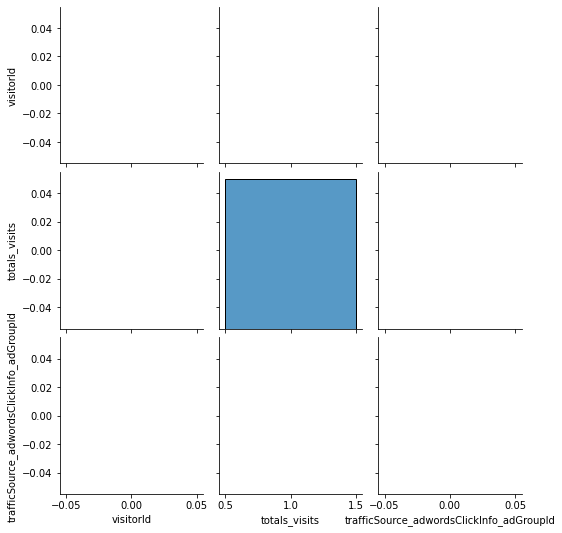

In [40]:
a = data.loc[0:1000, ["visitorId", "totals_visits", "trafficSource_adwordsClickInfo_adGroupId"]]
sns.pairplot(a)

In [26]:
sns.pairplot(data)

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

Error in callback <function flush_figures at 0x000002339F2243A0> (for post_execute):


KeyboardInterrupt: 